In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# 單層建構函式
def make_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

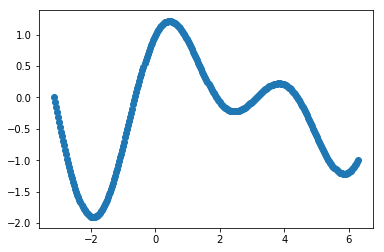

In [47]:
# 產生訓練資料
x_data = np.linspace(-np.pi,2*np.pi,300, dtype=np.float32)[:, np.newaxis]
y_data = np.cos(1.5*x_data)+np.sin(x_data) #Cos(2x)+Sin(3x)
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
# y_data = np.square(x_data) - 0.5 + noise
plt.scatter(x_data, y_data)
plt.show()

In [48]:
# 定義輸出入變數
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

# 定義多層流程
my_activation_function = tf.nn.tanh # 統一中間層活化函數
layer_hidden_1 = make_layer(xs, 1, 10, activation_function=my_activation_function)
layer_hidden_2 = make_layer(layer_hidden_1, 10, 10, activation_function=my_activation_function)
layer_output   = make_layer(layer_hidden_2, 10, 1) 

In [49]:
# 定義損失函數
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - layer_output), reduction_indices=[1]))

In [50]:
# 定義學習方法
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [51]:
# 變數初始化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [52]:
# 訓練
for i in range(10000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if(i%1000==0):
        print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))

1.739
0.0590741
0.00949363
0.00337213
0.00264348
0.00236505
0.00220948
0.00316104
0.00254644
0.0024693


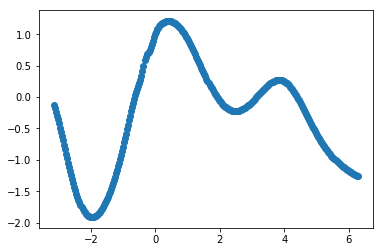

In [53]:
# 測試
x_test = [[i] for i in np.linspace(-np.pi,2*np.pi,300) ]
y_test = sess.run(layer_output, feed_dict={xs:x_test})
plt.scatter(x_test, y_test)
plt.show()

In [54]:
# 同場加映 SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [55]:
svr_model = SVR()
svr_model.fit(X=x_data, y=y_data[:,0])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
predict_result = svr_model.predict(x_data)
print("PCCs = {}".format(np.corrcoef(x=predict_result, y=y_data[:,0])))
print("MSE  = {}".format(mean_squared_error(y_data[:,0], predict_result)))

PCCs = [[ 1.          0.99919548]
 [ 0.99919548  1.        ]]
MSE  = 0.005725546965086583


In [ ]:
plt.pl